In [112]:
import qiskit
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService

# Program to Play Heads or Tails against a Quantum Computer 
To win you want the coin starting at heads to end on tails you and the quantum computer get a move to flip the coin from heads to tails or the other way around
The coin will start at heads

In [113]:
def headTailsCircuit(num_qubits, players_choice):
    qc = QuantumCircuit(num_qubits,1)
    
    # Put qubit in Superposition
    qc.h(0)

    # Flip coin and apply gate on cubit
    if players_choice:
        qc.z(0)

    # Unmix the Superposition
    qc.h(0)

    # Measure the Quantum Circuit
    qc.measure(0,0)
    
    return qc


# Now lets use the quntum circuit

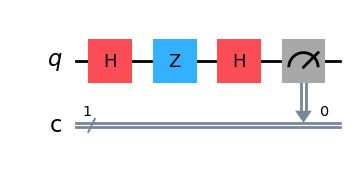

In [114]:
import matplotlib as mpl

choice = input("Please input a 1 if you would like to flip the coin to tails or keep it the same")
choice = int(choice)

qc = headTailsCircuit(1,choice)

heads = True
if choice == 1:
    heads == False

qc.draw('mpl')

# Backend Processing

In [115]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

backend_name = "ibm_rensselaer"
service = QiskitRuntimeService()
backend = service.get_backend(backend_name)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

# Executing on Backend

In [116]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(backend=backend)
job = sampler.run([isa_circuit])

print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: cs8b93m7yykg0082gyb0
>>> Job Status: QUEUED


In [117]:
result = job.result()
 
# Get results for the first (and only) PUB
pub_result = result[0]
print(f"Counts for the meas output register: {pub_result.data.c.get_counts()}")

Counts for the meas output register: {'1': 4090, '0': 6}


## Results
Using superposition data to decide to flip the coin or not
If the coin ends on tails you win heads you lose


In [118]:
counts = pub_result.data.c.get_counts()
state = max(counts, key=counts.get)


if state == '1':
    print("The Quantum Computer flips the coin")

    if choice == 1:
        print("You Lose! The Quantum Computer Wins")
    else:
        print("Wow how did you win?")
else:
    print("The Quantum Computer does not flip the coin")

    if choice == 0:
        print("You Lose! The Quantum Computer Wins")
    else:
        print("Wow how did you win?")

The Quantum Computer flips the coin
You Lose! The Quantum Computer Wins
